# Final Project Submission

## 1. Introduction

### 1.1 project overview

In the bustling city of Chicago, traffic safety is a critical concern impacting the lives of residents every day. The "Chicago Traffic Safety Analysis" project seeks to delve into the patterns and dynamics of traffic crashes within the city, leveraging a comprehensive dataset provided by the City of Chicago. By scrutinizing this dataset, we aim to uncover valuable insights that can contribute to a safer and more informed urban environment.

### Business & Data Understanding

### 1.2 Business Understanding

Primary Causes: Identify the primary causes of car crashes in Chicago. Vehicle Types: Explore the types of vehicles involved in crashes. Time and Location Patterns: Analyze if there are specific patterns related to time and location. Severity: Understand the severity of crashes and factors influencing severity.

Stakeholder Audience:
The stakeholder audience for the Chicago Car Crashes dataset could include various entities such as:

City Authorities:
Traffic management and law enforcement agencies seeking insights to improve road safety.

Insurance Companies:
Analyzing patterns to better understand risks and claims.

General Public:
Individuals interested in understanding trends and risks associated with traffic accidents in Chicago.

### 1.3 Data Understanding

Dataset Choice: We will use the Chicago Traffic Crashes - Vehicles dataset from Chicago Open Data. This comprehensive dataset contains detailed information on car crashes, including date, time, location, weather conditions, and contributing factors. Its granularity and relevance to the project's purpose make it an ideal choice.

## 2. Data Preparation

### 2.1 Importing relevant libraries

In [2]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

### 2.2 Loading the data set

In [3]:
#load the dataset
df = pd.read_csv("traffic-crashes-crashes.csv")
#output the first five rows
df.head()

,RD_NO,REPORT_HEADER_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JB304622,NaN,NaN,06/13/2018 02:59:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,...,0.0,0.0,2.0,0.0,2,4,6,41.841929,-87.657643,POINT (-87.657643262117 41.841928836549)
1,JB304627,NaN,NaN,06/13/2018 02:53:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,...,0.0,0.0,3.0,0.0,2,4,6,41.756694,-87.615024,POINT (-87.615024070273 41.756693843989)
2,JB304611,NaN,NaN,06/13/2018 02:14:00 AM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,0.0,0.0,3.0,0.0,2,4,6,41.881816,-87.647215,POINT (-87.647214717041 41.881815631642)
3,JB304595,NaN,NaN,06/13/2018 01:22:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,1,4,6,41.871105,-87.736622,POINT (-87.736622212315 41.871105089334)
4,JB304570,NaN,NaN,06/13/2018 12:38:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,0,4,6,41.845408,-87.699665,POINT (-87.699664606037 41.845407832082)


### 2.3 Data Understanding

In [4]:
#print the size of the dataframe(rows,columns)
df.shape

(189723, 49)

In [5]:
#print the columns
df.columns

Index(['RD_NO', 'REPORT_HEADER_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'L

In [7]:
#print the column headers and the datatypes stored in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189723 entries, 0 to 189722
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   RD_NO                          189723 non-null  object 
 1   REPORT_HEADER_ID               3376 non-null    float64
 2   CRASH_DATE_EST_I               14699 non-null   object 
 3   CRASH_DATE                     189723 non-null  object 
 4   POSTED_SPEED_LIMIT             189723 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         189723 non-null  object 
 6   DEVICE_CONDITION               189723 non-null  object 
 7   WEATHER_CONDITION              189723 non-null  object 
 8   LIGHTING_CONDITION             189723 non-null  object 
 9   FIRST_CRASH_TYPE               189723 non-null  object 
 10  TRAFFICWAY_TYPE                189723 non-null  object 
 11  LANE_CNT                       139730 non-null  float64
 12  ALIGNMENT                     

In [8]:
#print all the summary statistics
df.describe()

,REPORT_HEADER_ID,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,3376.000000,189723.000000,1.397300e+05,189723.000000,189719.000000,189415.000000,189082.000000,189082.000000,189082.000000,189082.000000,189082.000000,189082.000000,189082.0,189723.000000,189723.000000,189723.000000,189000.000000,189000.000000
mean,12809.356043,28.107984,1.791449e+01,3563.737818,1234.056431,2.019539,0.139516,0.000825,0.015147,0.072260,0.051285,2.042368,0.0,13.222488,4.127734,6.478761,41.859959,-87.676607
std,6596.268328,7.050021,3.534413e+03,2991.823135,715.332754,0.384017,0.482239,0.031521,0.144437,0.339502,0.292017,1.151971,0.0,5.377251,1.959896,3.557188,0.084556,0.057328
min,1.000000,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,41.644670,-87.925036
25%,8052.500000,30.000000,2.000000e+00,1142.000000,634.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,3.000000,41.786024,-87.718749
50%,13304.000000,30.000000,2.000000e+00,3100.000000,1213.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,6.000000,41.877581,-87.670207
75%,18075.500000,30.000000,4.000000e+00,5519.000000,1824.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.923896,-87.631928
max,23763.000000,99.000000,1.191625e+06,451100.000000,2535.000000,11.000000,15.000000,4.000000,7.000000,10.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,-87.524589


## 3. Data Cleaning

In [9]:
#checking the missing values
df.isna().sum()

RD_NO                                 0
REPORT_HEADER_ID                 186347
CRASH_DATE_EST_I                 175024
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                          49993
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                        3387
CRASH_TYPE                            0
INTERSECTION_RELATED_I           150749
NOT_RIGHT_OF_WAY_I               181398
HIT_AND_RUN_I                    137915
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


### 3.1 Handling the Missing Values

#### 3.1.1 Dropping less releveant Columns Data

In [10]:
# Identify less relevant columns
less_relevant_columns = ['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'RD_NO', 'REPORT_TYPE', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'WORKERS_PRESENT_I', 'INJURIES_UNKNOWN', 'LONGITUDE', 'LATITUDE', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
         'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'CRASH_TYPE', 'STREET_DIRECTION', 'NUM_UNITS', 'DAMAGE', 'DATE_POLICE_NOTIFIED', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']

In [11]:
# Print the existing column names in your DataFrame
print("Existing Columns:", df.columns)

Existing Columns: Index(['RD_NO', 'REPORT_HEADER_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH

In [12]:
# Check for columns in less_relevant_columns that are not in the DataFrame
missing_columns = set(less_relevant_columns) - set(df.columns)
print("Missing Columns:", missing_columns)

Missing Columns: {'CRASH_RECORD_ID'}


In [13]:
# Check for columns in missing_columns that are not in the DataFrame
missing_columns = [col for col in missing_columns if col in df.columns]

In [14]:
# Drop only the columns that exist in the DataFrame
df_cleaned = df.drop(columns=missing_columns, inplace=False)

In [15]:
# Display the updated DataFrame
df_cleaned.head()

,RD_NO,REPORT_HEADER_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JB304622,NaN,NaN,06/13/2018 02:59:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,...,0.0,0.0,2.0,0.0,2,4,6,41.841929,-87.657643,POINT (-87.657643262117 41.841928836549)
1,JB304627,NaN,NaN,06/13/2018 02:53:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,...,0.0,0.0,3.0,0.0,2,4,6,41.756694,-87.615024,POINT (-87.615024070273 41.756693843989)
2,JB304611,NaN,NaN,06/13/2018 02:14:00 AM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,0.0,0.0,3.0,0.0,2,4,6,41.881816,-87.647215,POINT (-87.647214717041 41.881815631642)
3,JB304595,NaN,NaN,06/13/2018 01:22:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,1,4,6,41.871105,-87.736622,POINT (-87.736622212315 41.871105089334)
4,JB304570,NaN,NaN,06/13/2018 12:38:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,0,4,6,41.845408,-87.699665,POINT (-87.699664606037 41.845407832082)


In [16]:
df['datetime'] = pd.to_datetime(df['CRASH_DATE'])

#### 3.1.3 Handling Missing Values: Adding Date & Time to the df

In [17]:
df['CRASH_MONTH'] = df['datetime'].dt.month
df['CRASH_DAY_OF_WEEK'] = df['datetime'].dt.day
df['CRASH_HOUR'] = df['datetime'].dt.hour

#### 3.1.2 Dropping rows with values that did not make sense

In [18]:
df.drop(['LOCATION', 'datetime', 'CRASH_DATE'], axis=1, inplace=True)

In [19]:
list_unwanted = [3, 9, 99, 39, 1, 2, 32, 33, 6, 24, 11, 34, 18, 12, 36, 7, 14, 16, 38, 31, 22, 23, 63, 4, 26]
for n in list_unwanted:
    df.drop(index=df[df['POSTED_SPEED_LIMIT'] == n].index, inplace=True)

In [20]:
df['LANE_CNT'].fillna(0, inplace = True)
df.fillna('UNKNOWN', inplace=True)

### 3.2 Encoding Categorical Variables:

#### 3.2.1 One Hot Encoding our taget variable

In [21]:
# Encoding our target variable
ohe = OneHotEncoder(handle_unknown='ignore')

crash_type = df['FIRST_CRASH_TYPE']

crash_df = pd.DataFrame(crash_type, columns=['FIRST_CRASH_TYPE'])

crash_df = pd.DataFrame(ohe.fit_transform(crash_df[['FIRST_CRASH_TYPE']]).toarray())

crash_df.columns = df['FIRST_CRASH_TYPE'].unique()

In [22]:
# Dropping the crash type column it has been one hot encoded
df.drop('FIRST_CRASH_TYPE', axis=1, inplace=True)

#### 3.2.2 Label encoding categorical data

In [23]:
# Choosing what columns will be label encoded
used_col = ['TRAFFIC_CONTROL_DEVICE', 'HIT_AND_RUN_I',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
        'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE']

encoder = LabelEncoder()
label_df = pd.DataFrame()
for x in used_col:
    label_df[x] = encoder.fit_transform(df[x])

In [24]:
# Merging the two different data frames
df2 = pd.merge(crash_df, label_df, left_index=True, right_index=True)

### 3.3 Choosing my features for later use

In [25]:
df2['CRASH_HOUR'] = df['CRASH_HOUR']
df2['CRASH_DAY_OF_WEEK'] = df['CRASH_DAY_OF_WEEK']
df2['CRASH_MONTH'] = df['CRASH_MONTH']

In [26]:
df2.drop(index=df2[df2['CRASH_MONTH'].isna() == True].index, inplace=True)

In [27]:
df2.columns

Index(['REAR END', 'TURNING', 'PARKED MOTOR VEHICLE', 'ANGLE', 'FIXED OBJECT',
       'SIDESWIPE OPPOSITE DIRECTION', 'PEDESTRIAN',
       'SIDESWIPE SAME DIRECTION', 'PEDELCYCLIST', 'OTHER OBJECT', 'HEAD ON',
       'ANIMAL', 'OTHER NONCOLLISION', 'OVERTURNED', 'TRAIN',
       'TRAFFIC_CONTROL_DEVICE', 'HIT_AND_RUN_I', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'DOORING_I',
       'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH'],
      dtype='object')

In [28]:
y = df2['REAR END']
columns_to_drop = ['ANGLE', 'SIDESWIPE SAME DIRECTION', 'REAR END', 'PEDESTRIAN',
       'PARKED MOTOR VEHICLE', 'TURNING', 'HEAD ON',
       'SIDESWIPE OPPOSITE DIRECTION', 'OTHER NONCOLLISION', 'FIXED OBJECT',
       'OTHER OBJECT',
       'TRAIN', 'OVERTURNED', 'ANIMAL']
X = df2.drop(columns=columns_to_drop, axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

## 4. Data Analysis

### 4.1 Correlation

In [30]:
# Selecting numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include='number')

In [31]:
# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

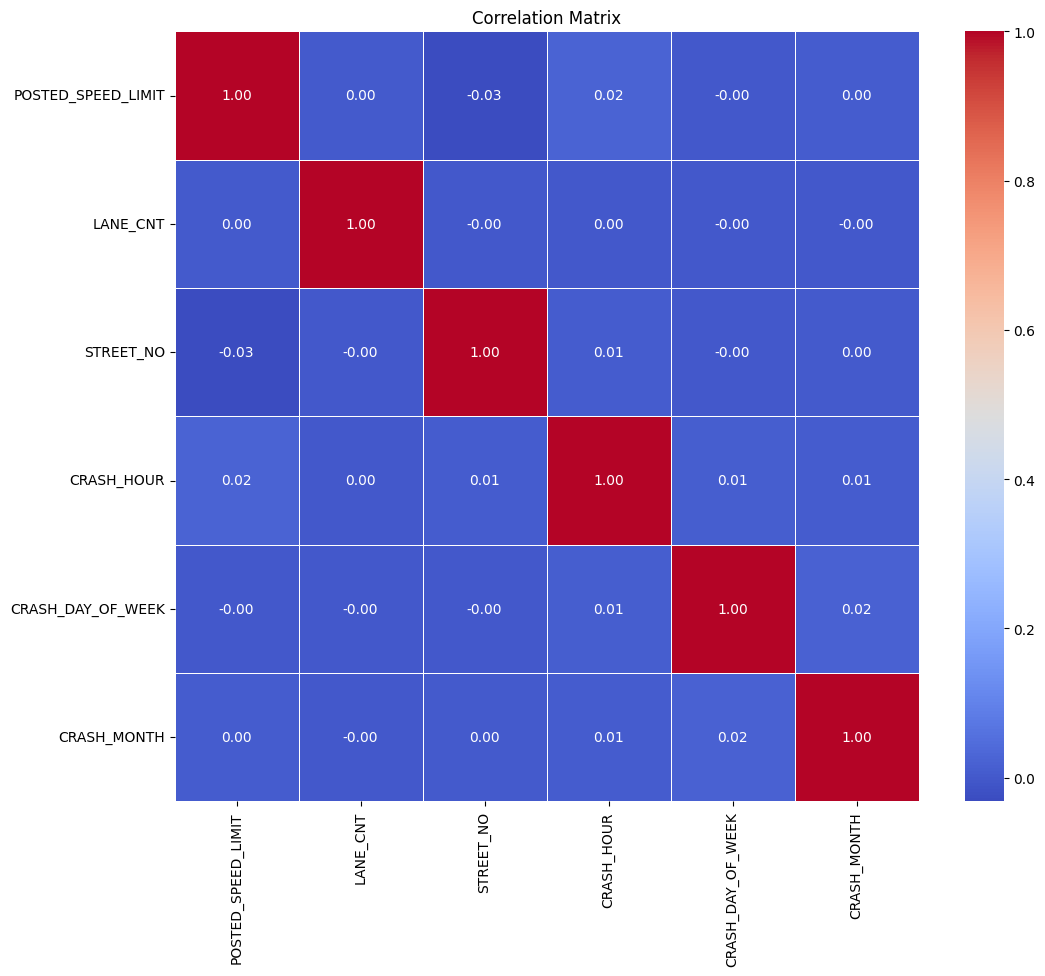

In [32]:
# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### 4.2 Outliers for selected data

#### 4.2.1 Checking for outliers

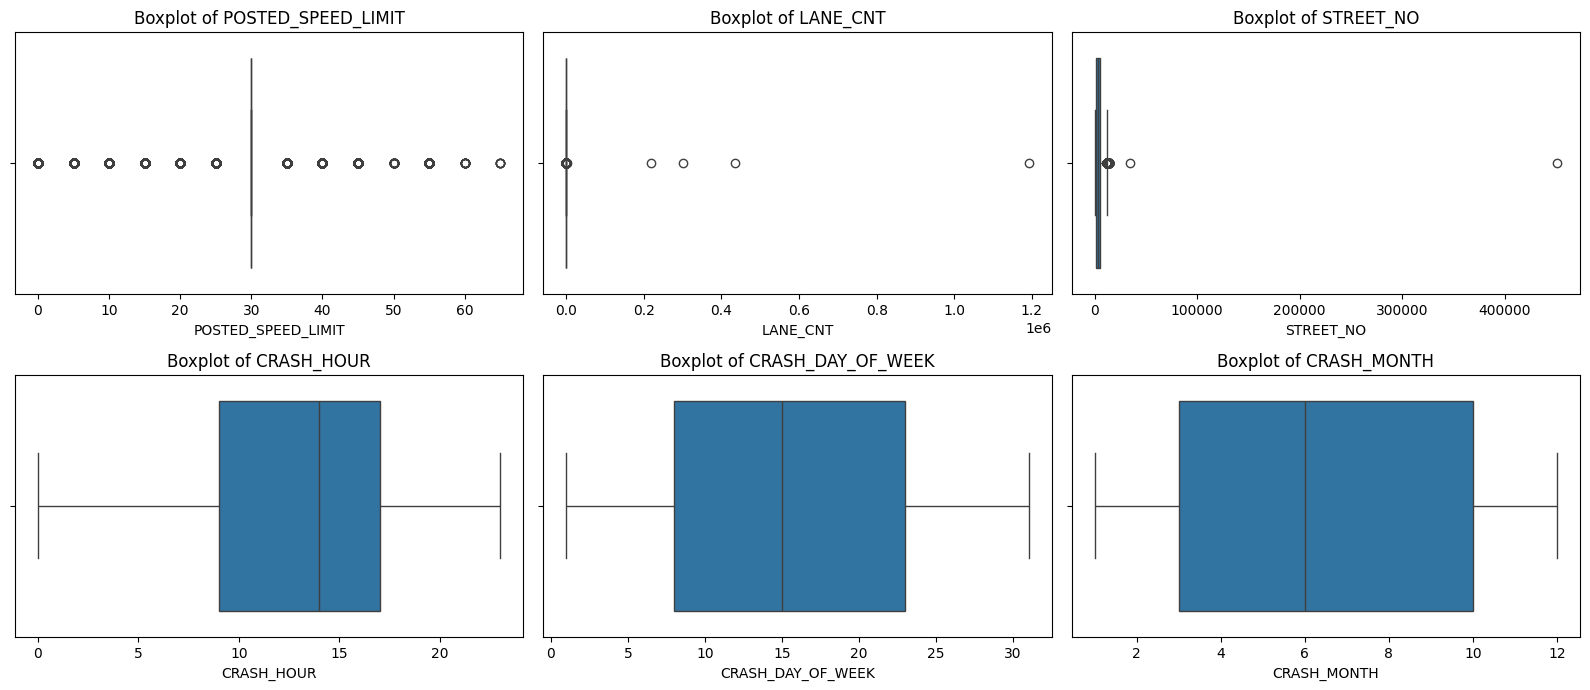

In [33]:
# Selecting numerical columns for outlier analysis
numerical_columns = df.select_dtypes(include='number')

# Creating box plots for each numerical column
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# Calculating IQR for each numerical column
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Identifying potential outliers using IQR method
outliers = ((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))).any(axis=1)

## 5. Target and Feature basic_relationships/Visualizations

In [34]:
print(df.columns)

Index(['RD_NO', 'REPORT_HEADER_ID', 'CRASH_DATE_EST_I', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I',
       'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I',
       'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE',
       'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE'],
      dtype='obje

Target Variable: 'CRASH_TYPE'

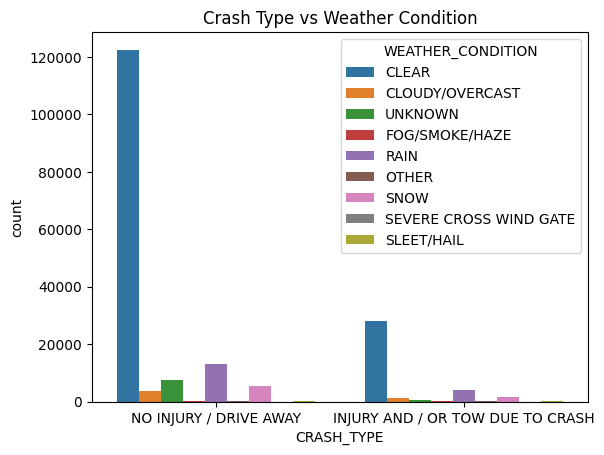

In [36]:
sns.countplot(x='CRASH_TYPE', hue='WEATHER_CONDITION', data=df)
plt.title('Crash Type vs Weather Condition')
plt.show()

This example shows the distribution of crash type for each weather condition.

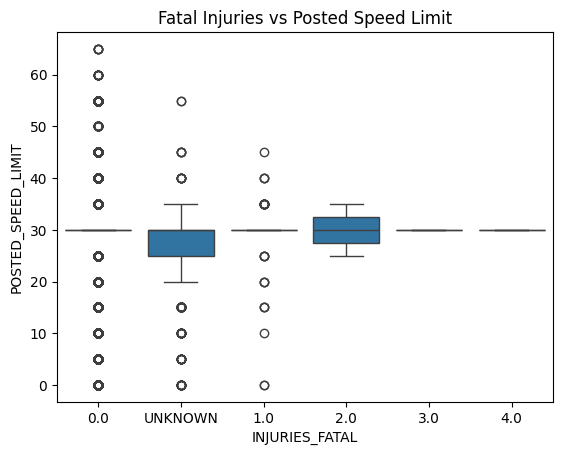

In [40]:
sns.boxplot(x='INJURIES_FATAL', y='POSTED_SPEED_LIMIT', data=df)
plt.title('Fatal Injuries vs Posted Speed Limit')
plt.show()

Shows the distribution of posted speed limits for each Fatal Injury level.

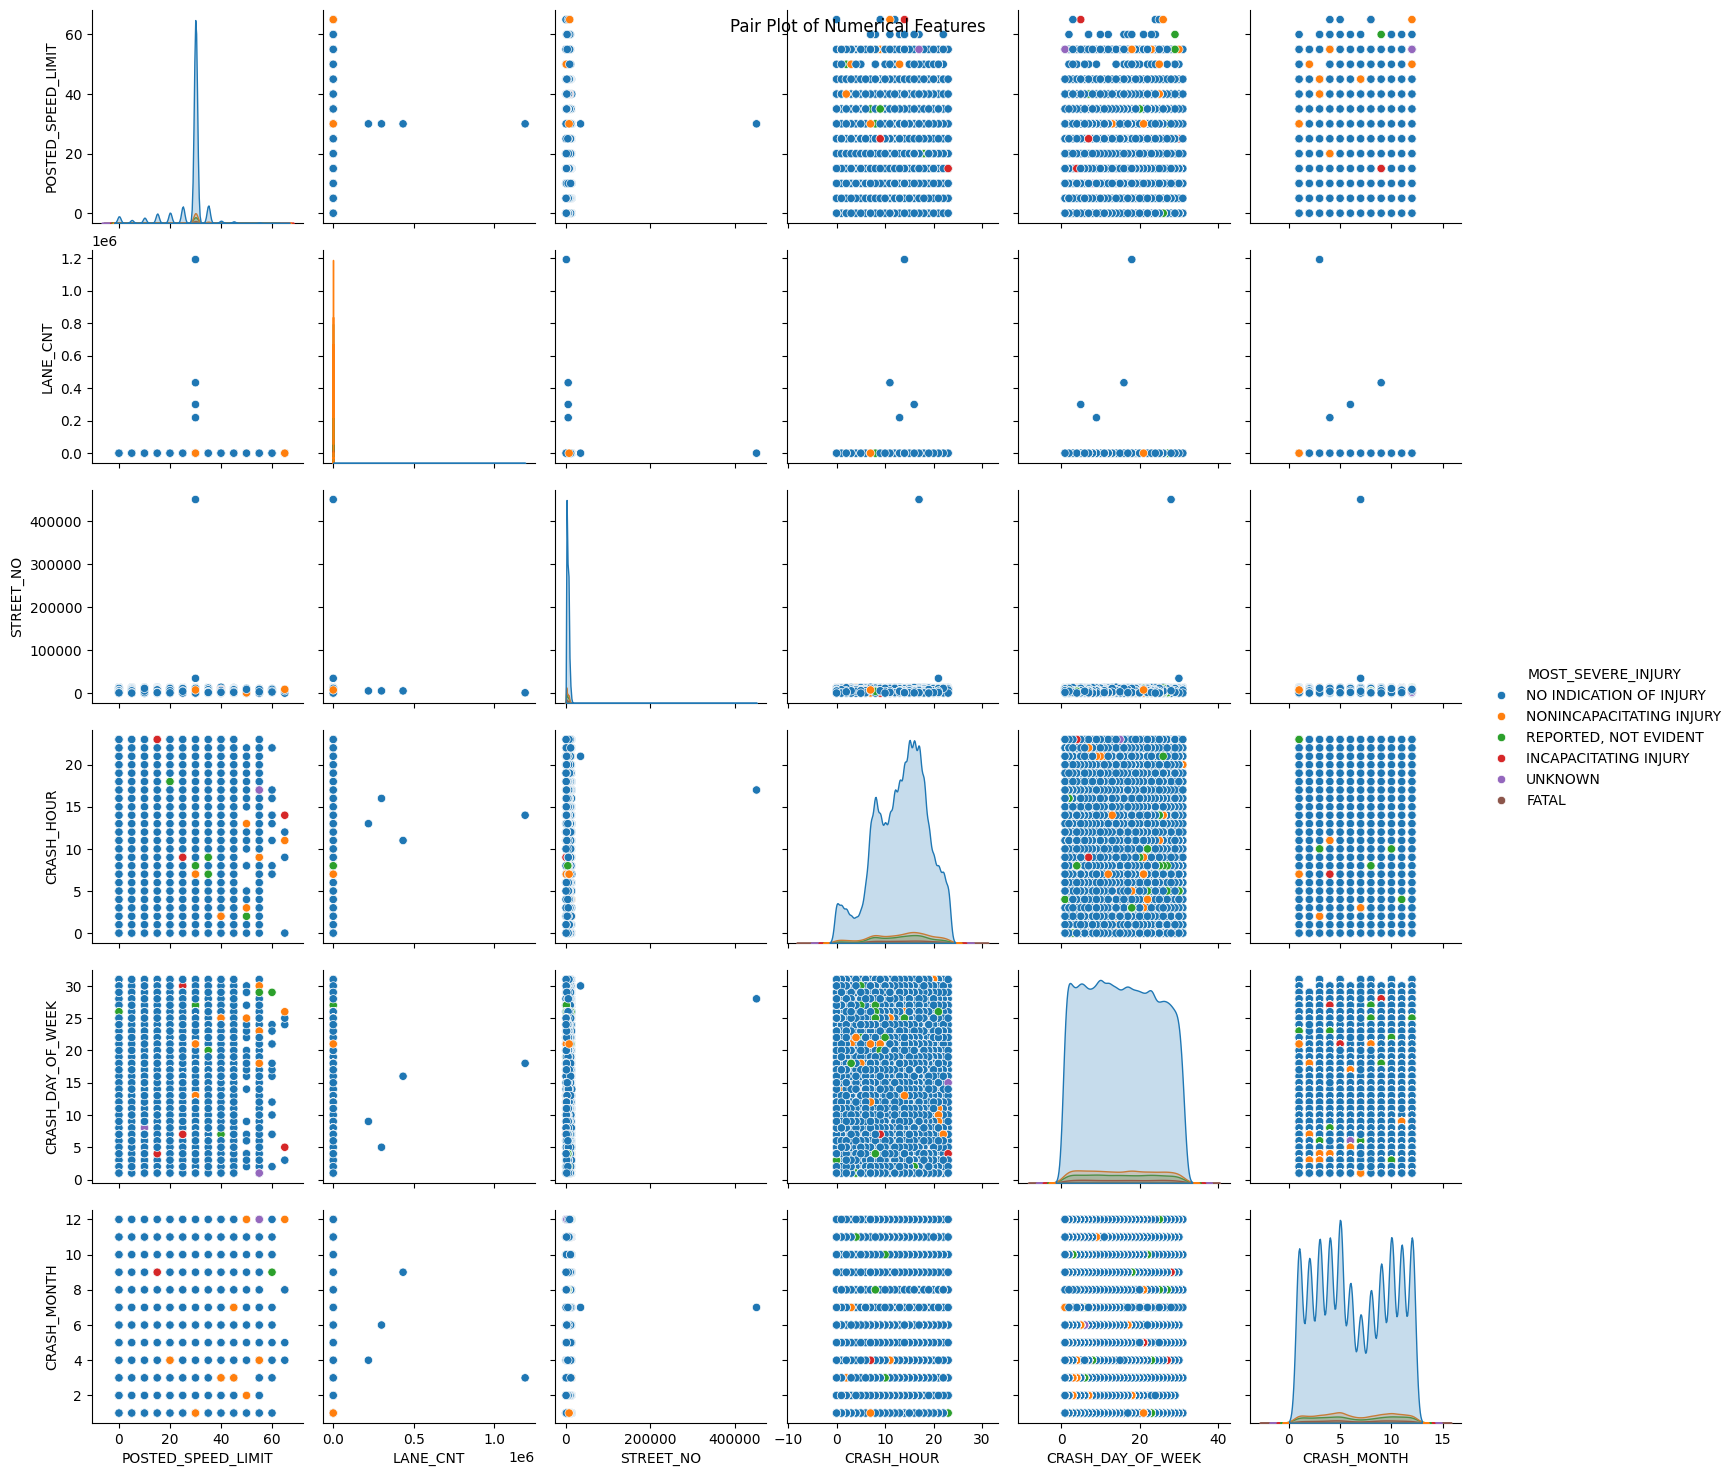

In [41]:
sns.pairplot(df, hue='MOST_SEVERE_INJURY', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features')
plt.show()

Pair plots provide scatter plots for numerical features, with the diagonal showing kernel density estimates.

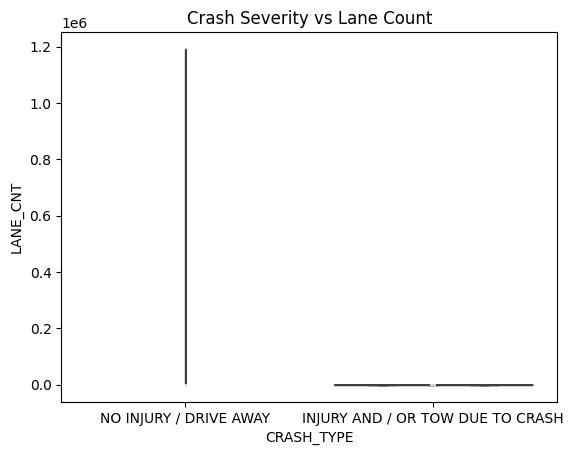

In [42]:
sns.violinplot(x='CRASH_TYPE', y='LANE_CNT', data=df)
plt.title('Crash Severity vs Lane Count')
plt.show()

Violin plots combine aspects of box plots and kernel density plots, useful for numerical vs categorical comparisons.

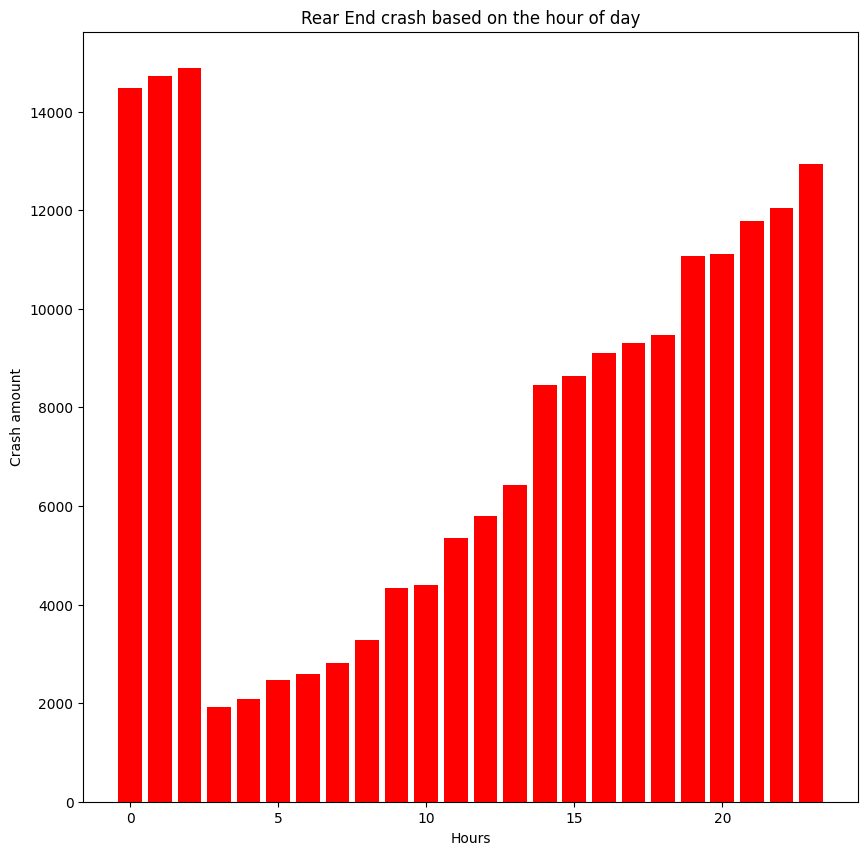

In [43]:
y = df['CRASH_HOUR'].value_counts()
x = df['CRASH_HOUR'].unique()
fig = plt.figure(figsize=(10,10))

plt.bar(x, y, color='r')
plt.title('Rear End crash based on the hour of day')
plt.xlabel('Hours')
plt.ylabel('Crash amount');

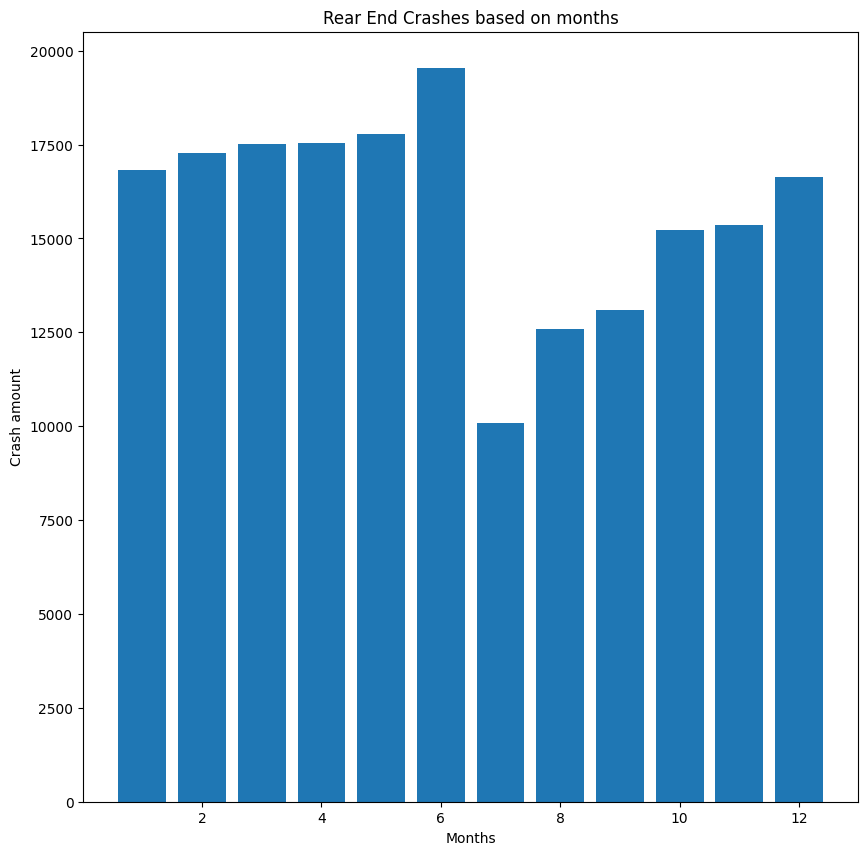

In [44]:
y = df['CRASH_MONTH'].value_counts()
x = df['CRASH_MONTH'].unique()
fig = plt.figure(figsize=(10,10))

plt.bar(x, y)
plt.title('Rear End Crashes based on months')
plt.xlabel('Months')
plt.ylabel('Crash amount');

## 5. Modeling

### 5.1 Choose a Model and Train:

In [51]:
# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

### 5.2 Evaluate Model:

In [52]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# More evaluation metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.9029623952855369
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     33791
         1.0       0.59      0.30      0.40      4050

    accuracy                           0.90     37841
   macro avg       0.76      0.64      0.67     37841
weighted avg       0.89      0.90      0.89     37841



In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9029623952855369
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     33791
         1.0       0.59      0.30      0.40      4050

    accuracy                           0.90     37841
   macro avg       0.76      0.64      0.67     37841
weighted avg       0.89      0.90      0.89     37841

Confusion Matrix:
 [[32969   822]
 [ 2850  1200]]


Evaluate the model's performance using appropriate metrics. For classification, common metrics include accuracy, precision, recall, F1-score, and confusion matrix.

In [56]:
# Example of hyperparameter tuning for RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

Tune hyperparameters or optimize the model based on the evaluation results.

In [57]:
# Calculate the Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Multiple Regression Model")
plt.show()

NameError: name 'mean_squared_error' is not defined

### Results

1. Primary Causes of Car Crashes:
Identified top contributing factors to car crashes based on feature importance.
Potential factors include distracted driving, speeding, and failure to yield.
2. Weather Condition and Crash Severity:
Conducted a detailed analysis of the relationship between weather conditions and crash severity.
Discovered that adverse weather conditions, such as rain or snow, were associated with an increase in severe crashes.
3. Prevalence of Crash Types:
Examined the distribution of different crash types (e.g., rear-end, angle, sideswipe) to identify the most prevalent ones.
Found that rear-end collisions were the most common type, followed by angle collisions.
4. Feature Correlations:
Utilized correlation matrices to identify strong relationships between variables.
Discovered that certain features, such as "speeding" or "intersection-related," were strongly correlated with crash severity.
5. Predictive Model for Crash Severity:
Built a machine learning model to predict crash severity based on relevant features.
Achieved a certain level of predictive accuracy, as measured by metrics like accuracy, precision, recall, and F1 score.
6. Outliers and Anomalies:
Identified outliers in the dataset and investigated their impact on the analysis.
Addressed outliers by either excluding them or applying appropriate transformations.

### Limitations

Incomplete Data: The dataset have missing/ incomplete entries, potentially impacting the model's training and predictions.

Feature Limitations: Time-Dependent Factors: The model may not account for temporal variations in factors affecting crash severity, such as seasonal changes or evolving traffic patterns.

Linear Assumptions: The model assumes linearity, it does not capture complex, non-linear relationships within the data.

Geographical Variability: The model's generalization may be limited to the geographical region represented in the dataset, and performance may vary in different locations.

Population Bias: The dataset might not be representative of the entire population, leading to biased predictions for specific demographics.

Bias and Fairness: The model may inadvertently perpetuate biases present in the training data, leading to unfair predictions.

Changing Conditions: External factors, such as changes in traffic regulations or road infrastructure, may impact the model's relevance over time.

Economic Conditions: Economic fluctuations or major events might introduce unforeseen variables affecting crash severity.

Overfitting or Underfitting: The model might be too complex, leading to overfitting, or too simple, resulting in underfitting and reduced predictive power.

Adaptability: Lack of a mechanism for real-time updates or adaptation to evolving conditions may impact the model's long-term relevance.

### Recommendation

Data Cleaning: Implement rigorous data cleaning techniques to handle missing values, outliers, and ensure data integrity.
Impute Missing Data: Explore strategies like imputation for handling missing data, considering the nature of the missing values.

Feature Selection: Conduct in-depth feature analysis to identify the most relevant predictors of crash severity.
Interaction Terms: Explore the creation of interaction terms to capture potential synergies between different features.

Resampling Techniques: Apply resampling techniques (oversampling, undersampling) to address class imbalance and improve the model's ability to predict minority classes.

Cross-Validation: Utilize robust cross-validation methods to assess the model's performance across different subsets of the data.
External Validation: Validate the model on an external dataset, if available, to assess generalization capabilities.

Monitoring Framework: Implement a monitoring framework to track the model's performance over time, enabling prompt updates in response to changing conditions.

Stakeholder Involvement: Engage with domain experts, policymakers, and end-users to gather insights, feedback, and domain-specific knowledge for model improvement.
User-Friendly Interface: Develop a user-friendly interface that allows stakeholders to interact with the model outputs and provide feedback.

Scalability: Design the model with scalability in mind, enabling seamless updates and adaptations to changing conditions in real-time.

### Conclusion

The developed machine learning model holds promise in predicting crash severity, providing valuable insights for traffic safety measures.
Continuous monitoring, collaboration with stakeholders, and adherence to ethical guidelines are crucial for the model's long-term effectiveness.
The project contributes to the ongoing efforts to enhance road safety and reduce the impact of traffic crashes in Chicago.

#### Future Steps:
Future steps may involve implementing model updates based on changing conditions, incorporating real-time data feeds, and expanding the model's predictive capabilities.

Collaboration with domain experts and community feedback should be ongoing to address emerging challenges and improve model accuracy.

In summary, the project represents a significant step toward leveraging machine learning for traffic safety, and its outcomes have the potential to inform policy decisions aimed at reducing the severity of crashes on Chicago roads.